# multinear regression                                               

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the libraries

# Importing the data 

In [2]:
df = pd.read_csv('D:\\machine learning data sets\\50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# splitting the dependent and independent variable

In [4]:
x = df.drop(columns = ['Profit'])
y = df['Profit']

In [5]:
x.isnull().sum().sum()

0

# encoding the categorical variable

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[3],)],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [7]:
x

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

# splitting the data set into test and training sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# training the multiple linear regression model on training set

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# predicting the test values

In [24]:
y_predct = regressor.predict(x_test)
y_predct.reshape(len(y_predct),1)


28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [29]:
y_tearr = np.array(y_test)
np.set_printoptions(precision = 3)

print(np.concatenate((y_predct.reshape(len(y_predct),1),y_tearr.reshape(len(y_tearr),1)),1))

[[103015.202 103282.38 ]
 [132582.278 144259.4  ]
 [132447.738 146121.95 ]
 [ 71976.099  77798.83 ]
 [178537.482 191050.39 ]
 [116161.242 105008.31 ]
 [ 67851.692  81229.06 ]
 [ 98791.734  97483.56 ]
 [113969.435 110352.25 ]
 [167921.066 166187.94 ]]


array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

ValueError: x and y must be the same size

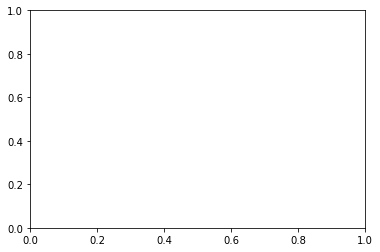

In [30]:

plt.show()

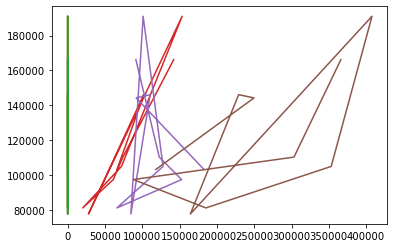

In [31]:
plt.plot(x_test,y_test)
plt.show()